<a href="https://colab.research.google.com/github/preranaprakashh/neuralnet/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#importing libraries required
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [42]:
#loading the dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [43]:
#printing sizes 
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  ' + str(x_test.shape))
print('Y_test:  ' + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [44]:
#normalization, channels last type
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [45]:
x_train = x_train/255
x_test = x_test/255

In [46]:
print("x_train shape", x_train.shape)
print("x_test shape", x_test.shape)

x_train shape (60000, 28, 28, 1)
x_test shape (10000, 28, 28, 1)


In [47]:
num_category = 10
y_train = tf.keras.utils.to_categorical(y_train, num_category)
y_test = tf.keras.utils.to_categorical(y_test, num_category)

In [48]:
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

y_train shape (60000, 10)
y_test shape (10000, 10)


In [53]:
#CNN implementation
model = Sequential()

#Layer 1
#convolutional layer with relu activation
#32 convolution filters used each of size 3x3
model.add(Conv2D(filters=32,kernel_size=(3,3),padding = "Same",activation = "relu",input_shape=input_shape))
#Layer 2
#convolutional layer with relu activation
#64 convolution filters used each of size 3x3
model.add(Conv2D(filters=64,kernel_size=(3,3),padding = "Same",activation = "relu", input_shape=input_shape))

#best features chosen using maxpooling
model.add(MaxPooling2D(pool_size = (2,2)))

#Fully Connected
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(num_category, activation = "softmax"))

In [55]:
#compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#training the model
model.fit(x = x_train,y = y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 206s 109ms/step - loss: 0.1905 - accuracy: 0.9433
Epoch 2/10
1875/1875 [==============================] - 205s 109ms/step - loss: 0.0814 - accuracy: 0.9765
Epoch 3/10
1875/1875 [==============================] - 204s 109ms/step - loss: 0.0615 - accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 203s 108ms/step - loss: 0.0480 - accuracy: 0.9848
Epoch 5/10
1875/1875 [==============================] - 206s 110ms/step - loss: 0.0423 - accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 208s 111ms/step - loss: 0.0363 - accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 207s 110ms/step - loss: 0.0319 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 207s 110ms/step - loss: 0.0291 - accuracy: 0.9905
Epoch 9/10
1875/1875 [==============================] - 209s 111ms/step - loss: 0.0252 - accuracy: 0.9922
Epoch 10/10
1875/1875 [=======================

In [56]:
model.evaluate(x_test,y_test)


313/313 [==============================] - 9s 27ms/step - loss: 0.0320 - accuracy: 0.9918


[0.031973641365766525, 0.9918000102043152]

In [59]:
y_predict = model.predict(x_test)
y_predict_labels = [np.argmax(i) for i in y_predict]

In [61]:
def plot_sample(index, x, y):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index], cmap='gray')
    plt.xlabel(str(y[index]))
    plt.show()

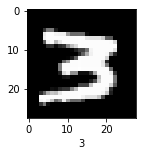

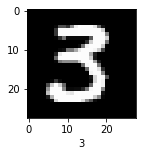

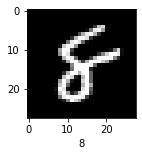

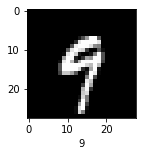

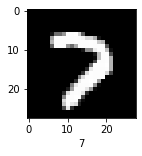

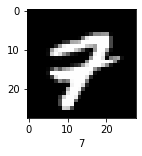

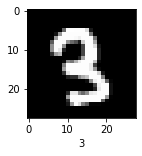

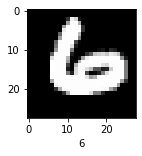

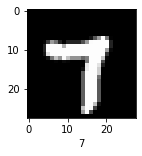

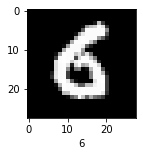

In [63]:
for i in np.random.randint(0,10000,10):
    plot_sample(i,tf.squeeze(x_test),y_predict_labels)